In [57]:
from ast import Lambda
from operator import index
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn

In [58]:
#function


def clean_weather_data_city(IN_PATH):
    
    city_weather_data = (pd.read_csv(IN_PATH))
    city_weather_data.set_index(pd.DatetimeIndex(city_weather_data['DATE']),inplace = True)   
    city_weather_data.drop(['DATE','STATION','NAME'],axis = 1,inplace = True)
    city_weather_data.iloc[:,13:] = city_weather_data.iloc[:,13:].fillna(value = 0)
    
    return city_weather_data
#read weather url and create weather data of each city with datetimeindex


def clean_city_pm25(IN_PATH):  
    city_pm25_data = (pd.read_csv(IN_PATH))
    city_pm25_data['Date'] = pd.to_datetime(city_pm25_data['Date'])
    
    pm25_station_date_mean = city_pm25_data.groupby(['Date','Site ID'])['Daily Mean PM2.5 Concentration'].mean()
    pm25_date_mean = pm25_station_date_mean.groupby('Date').mean().to_frame()
    pm25_aqi_station_date_mean = city_pm25_data.groupby(['Date','Site ID'])['DAILY_AQI_VALUE'].mean()
    pm25_aqi_date_mean = pm25_aqi_station_date_mean.groupby('Date').mean().to_frame()
    
    city_pm25_data = pd.merge(pm25_date_mean,pm25_aqi_date_mean,how = 'outer', left_index = True, right_index = True)
    city_pm25_data.columns = ['Daily Mean PM2.5 Concentration', 'DAILY AQI VALUE PM25']
    
    return city_pm25_data
#read pm2.5 csv and create pm2.5 data of each city with datatimeindex and get two means of indices groupby date and station


def merge_10_years_pm25(a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10):
    d0 = clean_city_pm25(a0)
    d1 = clean_city_pm25(a1)
    d2 = clean_city_pm25(a2)
    d3 = clean_city_pm25(a3)
    d4 = clean_city_pm25(a4)
    d5 = clean_city_pm25(a5)
    d6 = clean_city_pm25(a6)
    d7 = clean_city_pm25(a7)
    d8 = clean_city_pm25(a8)
    d9 = clean_city_pm25(a9)
    d10 = clean_city_pm25(a10)
    frames = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10]
    merge_data_pm25 = pd.concat(frames,join='outer')
    return merge_data_pm25
#merge 11 datasets of 11-year pm2.5 indices into one dataset


def clean_city_pm10(IN_PATH):
    city_pm10_data = (pd.read_csv(IN_PATH))
    city_pm10_data['Date'] = pd.to_datetime(city_pm10_data['Date'])
    
    pm10_station_date_mean = city_pm10_data.groupby(['Date','Site ID'])['Daily Mean PM10 Concentration'].mean()
    pm10_date_mean = pm10_station_date_mean.groupby('Date').mean().to_frame()
    
    pm10_aqi_station_date_mean = city_pm10_data.groupby(['Date','Site ID'])['DAILY_AQI_VALUE'].mean()
    pm10_aqi_date_mean = pm10_aqi_station_date_mean.groupby('Date').mean().to_frame()
    
    city_pm10_data = pd.merge(pm10_date_mean,pm10_aqi_date_mean,how = 'outer', left_index = True, right_index = True)
    city_pm10_data.columns = ['Daily Mean PM10 Concentration', 'DAILY AQI VALUE PM10']
    
    return city_pm10_data
#read pm10 csv and create pm10 data of each city with datatimeindex and get two means of indices groupby date and station


def merge_10_years_pm10(a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10):
    d0 = clean_city_pm10(a0)
    d1 = clean_city_pm10(a1)
    d2 = clean_city_pm10(a2)
    d3 = clean_city_pm10(a3)
    d4 = clean_city_pm10(a4)
    d5 = clean_city_pm10(a5)
    d6 = clean_city_pm10(a6)
    d7 = clean_city_pm10(a7)
    d8 = clean_city_pm10(a8)
    d9 = clean_city_pm10(a9)
    d10 = clean_city_pm10(a10)
    frames = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10]
    merge_data_pm10 = pd.concat(frames,join='outer')
    return merge_data_pm10
#merge 11 datasets of 11-year pm10 indices into one dataset


def clean_city_no2(IN_PATH):
    city_no2_data = (pd.read_csv(IN_PATH))
    city_no2_data['Date'] = pd.to_datetime(city_no2_data['Date'])
    
    no2_station_date_mean = city_no2_data.groupby(['Date','Site ID'])['Daily Max 1-hour NO2 Concentration'].mean()
    no2_date_mean = no2_station_date_mean.groupby('Date').mean().to_frame()
    
    no2_aqi_station_date_mean = city_no2_data.groupby(['Date','Site ID'])['DAILY_AQI_VALUE'].mean()
    no2_aqi_date_mean=no2_aqi_station_date_mean.groupby('Date').mean().to_frame()
    
    city_no2_data = pd.merge(no2_date_mean,no2_aqi_date_mean,how = 'outer', left_index = True, right_index = True)
    city_no2_data.columns = ['Daily Mean NO2 Concentration', 'DAILY AQI VALUE NO2']
    return city_no2_data
#merge 11 datasets of 11-year no2 indices into one dataset


def merge_10_years_no2(a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10):
    d0 = clean_city_no2(a0)
    d1 = clean_city_no2(a1)
    d2 = clean_city_no2(a2)
    d3 = clean_city_no2(a3)
    d4 = clean_city_no2(a4)
    d5 = clean_city_no2(a5)
    d6 = clean_city_no2(a6)
    d7 = clean_city_no2(a7)
    d8 = clean_city_no2(a8)
    d9 = clean_city_no2(a9)
    d10 = clean_city_no2(a10)
    frames = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10]
    merge_data_no2 = pd.concat(frames,join='outer')
    return merge_data_no2
#merge 11 datasets of 11-year no2 indices into one dataset


def city_merge_air_pollution(pm25data, pm10data, no2data):
    
    city_air_pollution = pd.merge(pm25data, pm10data, how = 'outer', left_index = True, right_index = True)
    city_air_pollution = pd.merge(city_air_pollution, no2data, how = 'outer', left_index = True, right_index = True)
    
    return city_air_pollution
#merge 3 air pollution indices of each city into one dataset


def city_merge_weather_pollution(city_weather_data, city_air_pollution_data):
    
    city_merge = pd.merge(city_weather_data, city_air_pollution_data, how = 'outer', left_index = True, right_index= True )
    
    return city_merge
#merge air pollution indices of each city with their own weather data according to datetimeindex



In [59]:
#path for weather url and air pollution datasets
AUSTIN_WEATHER_URL = 'https://www.ncei.noaa.gov/orders/cdo/2914936.csv'
DALLAS_WEATHER_URL = 'https://www.ncei.noaa.gov/orders/cdo/2914942.csv'
HOUSTON_WEATHER_URL = 'https://www.ncei.noaa.gov/orders/cdo/2914949.csv'
LOS_ANGELES_WEATHER_URL = 'https://www.ncei.noaa.gov/orders/cdo/2914952.csv'
NEW_YORK_WEATHER_URL = 'https://www.ncei.noaa.gov/orders/cdo/2914957.csv'

IN_PATH_AUSTIN_PM25_2020 = os.path.join('air_pollution','austin','pm25','austin_2020_pm25.csv')
IN_PATH_AUSTIN_PM25_2019 = os.path.join('air_pollution','austin','pm25','austin_2019_pm25.csv')
IN_PATH_AUSTIN_PM25_2018 = os.path.join('air_pollution','austin','pm25','austin_2018_pm25.csv')
IN_PATH_AUSTIN_PM25_2017 = os.path.join('air_pollution','austin','pm25','austin_2017_pm25.csv')
IN_PATH_AUSTIN_PM25_2016 = os.path.join('air_pollution','austin','pm25','austin_2016_pm25.csv')
IN_PATH_AUSTIN_PM25_2015 = os.path.join('air_pollution','austin','pm25','austin_2015_pm25.csv')
IN_PATH_AUSTIN_PM25_2014 = os.path.join('air_pollution','austin','pm25','austin_2014_pm25.csv')
IN_PATH_AUSTIN_PM25_2013 = os.path.join('air_pollution','austin','pm25','austin_2013_pm25.csv')
IN_PATH_AUSTIN_PM25_2012 = os.path.join('air_pollution','austin','pm25','austin_2012_pm25.csv')
IN_PATH_AUSTIN_PM25_2011 = os.path.join('air_pollution','austin','pm25','austin_2011_pm25.csv')
IN_PATH_AUSTIN_PM25_2010 = os.path.join('air_pollution','austin','pm25','austin_2010_pm25.csv')

IN_PATH_HOUSTON_PM25_2020 = os.path.join('air_pollution','houston','pm25','houston_2020_pm25.csv')
IN_PATH_HOUSTON_PM25_2019 = os.path.join('air_pollution','houston','pm25','houston_2019_pm25.csv')
IN_PATH_HOUSTON_PM25_2018 = os.path.join('air_pollution','houston','pm25','houston_2018_pm25.csv')
IN_PATH_HOUSTON_PM25_2017 = os.path.join('air_pollution','houston','pm25','houston_2017_pm25.csv')
IN_PATH_HOUSTON_PM25_2016 = os.path.join('air_pollution','houston','pm25','houston_2016_pm25.csv')
IN_PATH_HOUSTON_PM25_2015 = os.path.join('air_pollution','houston','pm25','houston_2015_pm25.csv')
IN_PATH_HOUSTON_PM25_2014 = os.path.join('air_pollution','houston','pm25','houston_2014_pm25.csv')
IN_PATH_HOUSTON_PM25_2013 = os.path.join('air_pollution','houston','pm25','houston_2013_pm25.csv')
IN_PATH_HOUSTON_PM25_2012 = os.path.join('air_pollution','houston','pm25','houston_2012_pm25.csv')
IN_PATH_HOUSTON_PM25_2011 = os.path.join('air_pollution','houston','pm25','houston_2011_pm25.csv')
IN_PATH_HOUSTON_PM25_2010 = os.path.join('air_pollution','houston','pm25','houston_2010_pm25.csv')
IN_PATH_DALLAS_PM25_2020 = os.path.join('air_pollution','dallas','pm25','dallas_2020_pm25.csv')

IN_PATH_DALLAS_PM25_2019 = os.path.join('air_pollution','dallas','pm25','dallas_2019_pm25.csv')
IN_PATH_DALLAS_PM25_2018 = os.path.join('air_pollution','dallas','pm25','dallas_2018_pm25.csv')
IN_PATH_DALLAS_PM25_2017 = os.path.join('air_pollution','dallas','pm25','dallas_2017_pm25.csv')
IN_PATH_DALLAS_PM25_2016 = os.path.join('air_pollution','dallas','pm25','dallas_2016_pm25.csv')
IN_PATH_DALLAS_PM25_2015 = os.path.join('air_pollution','dallas','pm25','dallas_2015_pm25.csv')
IN_PATH_DALLAS_PM25_2014 = os.path.join('air_pollution','dallas','pm25','dallas_2014_pm25.csv')
IN_PATH_DALLAS_PM25_2013 = os.path.join('air_pollution','dallas','pm25','dallas_2013_pm25.csv')
IN_PATH_DALLAS_PM25_2012 = os.path.join('air_pollution','dallas','pm25','dallas_2012_pm25.csv')
IN_PATH_DALLAS_PM25_2011 = os.path.join('air_pollution','dallas','pm25','dallas_2011_pm25.csv')
IN_PATH_DALLAS_PM25_2010 = os.path.join('air_pollution','dallas','pm25','dallas_2010_pm25.csv')

IN_PATH_LOS_ANGELES_PM25_2020 = os.path.join('air_pollution','los_angeles','pm25','la_2020_pm25.csv')
IN_PATH_LOS_ANGELES_PM25_2019 = os.path.join('air_pollution','los_angeles','pm25','la_2019_pm25.csv')
IN_PATH_LOS_ANGELES_PM25_2018 = os.path.join('air_pollution','los_angeles','pm25','la_2018_pm25.csv')
IN_PATH_LOS_ANGELES_PM25_2017 = os.path.join('air_pollution','los_angeles','pm25','la_2017_pm25.csv')
IN_PATH_LOS_ANGELES_PM25_2016 = os.path.join('air_pollution','los_angeles','pm25','la_2016_pm25.csv')
IN_PATH_LOS_ANGELES_PM25_2015 = os.path.join('air_pollution','los_angeles','pm25','la_2015_pm25.csv')
IN_PATH_LOS_ANGELES_PM25_2014 = os.path.join('air_pollution','los_angeles','pm25','la_2014_pm25.csv')
IN_PATH_LOS_ANGELES_PM25_2013 = os.path.join('air_pollution','los_angeles','pm25','la_2013_pm25.csv')
IN_PATH_LOS_ANGELES_PM25_2012 = os.path.join('air_pollution','los_angeles','pm25','la_2012_pm25.csv')
IN_PATH_LOS_ANGELES_PM25_2011 = os.path.join('air_pollution','los_angeles','pm25','la_2011_pm25.csv')
IN_PATH_LOS_ANGELES_PM25_2010 = os.path.join('air_pollution','los_angeles','pm25','la_2010_pm25.csv')

IN_PATH_NEW_YORK_PM25_2020 = os.path.join('air_pollution','new_york','pm25','ny_2020_pm25.csv')
IN_PATH_NEW_YORK_PM25_2019 = os.path.join('air_pollution','new_york','pm25','ny_2019_pm25.csv')
IN_PATH_NEW_YORK_PM25_2018 = os.path.join('air_pollution','new_york','pm25','ny_2018_pm25.csv')
IN_PATH_NEW_YORK_PM25_2017 = os.path.join('air_pollution','new_york','pm25','ny_2017_pm25.csv')
IN_PATH_NEW_YORK_PM25_2016 = os.path.join('air_pollution','new_york','pm25','ny_2016_pm25.csv')
IN_PATH_NEW_YORK_PM25_2015 = os.path.join('air_pollution','new_york','pm25','ny_2015_pm25.csv')
IN_PATH_NEW_YORK_PM25_2014 = os.path.join('air_pollution','new_york','pm25','ny_2014_pm25.csv')
IN_PATH_NEW_YORK_PM25_2013 = os.path.join('air_pollution','new_york','pm25','ny_2013_pm25.csv')
IN_PATH_NEW_YORK_PM25_2012 = os.path.join('air_pollution','new_york','pm25','ny_2012_pm25.csv')
IN_PATH_NEW_YORK_PM25_2011 = os.path.join('air_pollution','new_york','pm25','ny_2011_pm25.csv')
IN_PATH_NEW_YORK_PM25_2010 = os.path.join('air_pollution','new_york','pm25','ny_2010_pm25.csv')

IN_PATH_AUSTIN_PM10_2020 = os.path.join('air_pollution','austin','pm10','austin_2020_pm10.csv')
IN_PATH_AUSTIN_PM10_2019 = os.path.join('air_pollution','austin','pm10','austin_2019_pm10.csv')
IN_PATH_AUSTIN_PM10_2018 = os.path.join('air_pollution','austin','pm10','austin_2018_pm10.csv')
IN_PATH_AUSTIN_PM10_2017 = os.path.join('air_pollution','austin','pm10','austin_2017_pm10.csv')
IN_PATH_AUSTIN_PM10_2016 = os.path.join('air_pollution','austin','pm10','austin_2016_pm10.csv')
IN_PATH_AUSTIN_PM10_2015 = os.path.join('air_pollution','austin','pm10','austin_2015_pm10.csv')
IN_PATH_AUSTIN_PM10_2014 = os.path.join('air_pollution','austin','pm10','austin_2014_pm10.csv')
IN_PATH_AUSTIN_PM10_2013 = os.path.join('air_pollution','austin','pm10','austin_2013_pm10.csv')
IN_PATH_AUSTIN_PM10_2012 = os.path.join('air_pollution','austin','pm10','austin_2012_pm10.csv')
IN_PATH_AUSTIN_PM10_2011 = os.path.join('air_pollution','austin','pm10','austin_2011_pm10.csv')
IN_PATH_AUSTIN_PM10_2010 = os.path.join('air_pollution','austin','pm10','austin_2010_pm10.csv')

IN_PATH_HOUSTON_PM10_2020 = os.path.join('air_pollution','houston','pm10','houston_2020_pm10.csv')
IN_PATH_HOUSTON_PM10_2019 = os.path.join('air_pollution','houston','pm10','houston_2019_pm10.csv')
IN_PATH_HOUSTON_PM10_2018 = os.path.join('air_pollution','houston','pm10','houston_2018_pm10.csv')
IN_PATH_HOUSTON_PM10_2017 = os.path.join('air_pollution','houston','pm10','houston_2017_pm10.csv')
IN_PATH_HOUSTON_PM10_2016 = os.path.join('air_pollution','houston','pm10','houston_2016_pm10.csv')
IN_PATH_HOUSTON_PM10_2015 = os.path.join('air_pollution','houston','pm10','houston_2015_pm10.csv')
IN_PATH_HOUSTON_PM10_2014 = os.path.join('air_pollution','houston','pm10','houston_2014_pm10.csv')
IN_PATH_HOUSTON_PM10_2013 = os.path.join('air_pollution','houston','pm10','houston_2013_pm10.csv')
IN_PATH_HOUSTON_PM10_2012 = os.path.join('air_pollution','houston','pm10','houston_2012_pm10.csv')
IN_PATH_HOUSTON_PM10_2011 = os.path.join('air_pollution','houston','pm10','houston_2011_pm10.csv')
IN_PATH_HOUSTON_PM10_2010 = os.path.join('air_pollution','houston','pm10','houston_2010_pm10.csv')

IN_PATH_DALLAS_PM10_2020 = os.path.join('air_pollution','dallas','pm10','dallas_2020_pm10.csv')
IN_PATH_DALLAS_PM10_2019 = os.path.join('air_pollution','dallas','pm10','dallas_2019_pm10.csv')
IN_PATH_DALLAS_PM10_2018 = os.path.join('air_pollution','dallas','pm10','dallas_2018_pm10.csv')
IN_PATH_DALLAS_PM10_2017 = os.path.join('air_pollution','dallas','pm10','dallas_2017_pm10.csv')
IN_PATH_DALLAS_PM10_2016 = os.path.join('air_pollution','dallas','pm10','dallas_2016_pm10.csv')
IN_PATH_DALLAS_PM10_2015 = os.path.join('air_pollution','dallas','pm10','dallas_2015_pm10.csv')
IN_PATH_DALLAS_PM10_2014 = os.path.join('air_pollution','dallas','pm10','dallas_2014_pm10.csv')
IN_PATH_DALLAS_PM10_2013 = os.path.join('air_pollution','dallas','pm10','dallas_2013_pm10.csv')
IN_PATH_DALLAS_PM10_2012 = os.path.join('air_pollution','dallas','pm10','dallas_2012_pm10.csv')
IN_PATH_DALLAS_PM10_2011 = os.path.join('air_pollution','dallas','pm10','dallas_2011_pm10.csv')
IN_PATH_DALLAS_PM10_2010 = os.path.join('air_pollution','dallas','pm10','dallas_2010_pm10.csv')

IN_PATH_LOS_ANGELES_PM10_2020 = os.path.join('air_pollution','los_angeles','pm10','la_2020_pm10.csv')
IN_PATH_LOS_ANGELES_PM10_2019 = os.path.join('air_pollution','los_angeles','pm10','la_2019_pm10.csv')
IN_PATH_LOS_ANGELES_PM10_2018 = os.path.join('air_pollution','los_angeles','pm10','la_2018_pm10.csv')
IN_PATH_LOS_ANGELES_PM10_2017 = os.path.join('air_pollution','los_angeles','pm10','la_2017_pm10.csv')
IN_PATH_LOS_ANGELES_PM10_2016 = os.path.join('air_pollution','los_angeles','pm10','la_2016_pm10.csv')
IN_PATH_LOS_ANGELES_PM10_2015 = os.path.join('air_pollution','los_angeles','pm10','la_2015_pm10.csv')
IN_PATH_LOS_ANGELES_PM10_2014 = os.path.join('air_pollution','los_angeles','pm10','la_2014_pm10.csv')
IN_PATH_LOS_ANGELES_PM10_2013 = os.path.join('air_pollution','los_angeles','pm10','la_2013_pm10.csv')
IN_PATH_LOS_ANGELES_PM10_2012 = os.path.join('air_pollution','los_angeles','pm10','la_2012_pm10.csv')
IN_PATH_LOS_ANGELES_PM10_2011 = os.path.join('air_pollution','los_angeles','pm10','la_2011_pm10.csv')
IN_PATH_LOS_ANGELES_PM10_2010 = os.path.join('air_pollution','los_angeles','pm10','la_2010_pm10.csv')

IN_PATH_NEW_YORK_PM10_2020 = os.path.join('air_pollution','new_york','pm10','ny_2020_pm10.csv')
IN_PATH_NEW_YORK_PM10_2019 = os.path.join('air_pollution','new_york','pm10','ny_2019_pm10.csv')
IN_PATH_NEW_YORK_PM10_2018 = os.path.join('air_pollution','new_york','pm10','ny_2018_pm10.csv')
IN_PATH_NEW_YORK_PM10_2017 = os.path.join('air_pollution','new_york','pm10','ny_2017_pm10.csv')
IN_PATH_NEW_YORK_PM10_2016 = os.path.join('air_pollution','new_york','pm10','ny_2016_pm10.csv')
IN_PATH_NEW_YORK_PM10_2015 = os.path.join('air_pollution','new_york','pm10','ny_2015_pm10.csv')
IN_PATH_NEW_YORK_PM10_2014 = os.path.join('air_pollution','new_york','pm10','ny_2014_pm10.csv')
IN_PATH_NEW_YORK_PM10_2013 = os.path.join('air_pollution','new_york','pm10','ny_2013_pm10.csv')
IN_PATH_NEW_YORK_PM10_2012 = os.path.join('air_pollution','new_york','pm10','ny_2012_pm10.csv')
IN_PATH_NEW_YORK_PM10_2011 = os.path.join('air_pollution','new_york','pm10','ny_2011_pm10.csv')
IN_PATH_NEW_YORK_PM10_2010 = os.path.join('air_pollution','new_york','pm10','ny_2010_pm10.csv')

IN_PATH_AUSTIN_NO2_2020 = os.path.join('air_pollution','austin','no2','austin_2020_no2.csv')
IN_PATH_AUSTIN_NO2_2019 = os.path.join('air_pollution','austin','no2','austin_2019_no2.csv')
IN_PATH_AUSTIN_NO2_2018 = os.path.join('air_pollution','austin','no2','austin_2018_no2.csv')
IN_PATH_AUSTIN_NO2_2017 = os.path.join('air_pollution','austin','no2','austin_2017_no2.csv')
IN_PATH_AUSTIN_NO2_2016 = os.path.join('air_pollution','austin','no2','austin_2016_no2.csv')
IN_PATH_AUSTIN_NO2_2015 = os.path.join('air_pollution','austin','no2','austin_2015_no2.csv')
IN_PATH_AUSTIN_NO2_2014 = os.path.join('air_pollution','austin','no2','austin_2014_no2.csv')
IN_PATH_AUSTIN_NO2_2013 = os.path.join('air_pollution','austin','no2','austin_2013_no2.csv')
IN_PATH_AUSTIN_NO2_2012 = os.path.join('air_pollution','austin','no2','austin_2012_no2.csv')
IN_PATH_AUSTIN_NO2_2011 = os.path.join('air_pollution','austin','no2','austin_2011_no2.csv')
IN_PATH_AUSTIN_NO2_2010 = os.path.join('air_pollution','austin','no2','austin_2010_no2.csv')

IN_PATH_DALLAS_NO2_2020 = os.path.join('air_pollution','dallas','no2','dallas_2020_no2.csv')
IN_PATH_DALLAS_NO2_2019 = os.path.join('air_pollution','dallas','no2','dallas_2019_no2.csv')
IN_PATH_DALLAS_NO2_2018 = os.path.join('air_pollution','dallas','no2','dallas_2018_no2.csv')
IN_PATH_DALLAS_NO2_2017 = os.path.join('air_pollution','dallas','no2','dallas_2017_no2.csv')
IN_PATH_DALLAS_NO2_2016 = os.path.join('air_pollution','dallas','no2','dallas_2016_no2.csv')
IN_PATH_DALLAS_NO2_2015 = os.path.join('air_pollution','dallas','no2','dallas_2015_no2.csv')
IN_PATH_DALLAS_NO2_2014 = os.path.join('air_pollution','dallas','no2','dallas_2014_no2.csv')
IN_PATH_DALLAS_NO2_2013 = os.path.join('air_pollution','dallas','no2','dallas_2013_no2.csv')
IN_PATH_DALLAS_NO2_2012 = os.path.join('air_pollution','dallas','no2','dallas_2012_no2.csv')
IN_PATH_DALLAS_NO2_2011 = os.path.join('air_pollution','dallas','no2','dallas_2011_no2.csv')
IN_PATH_DALLAS_NO2_2010 = os.path.join('air_pollution','dallas','no2','dallas_2010_no2.csv')

IN_PATH_HOUSTON_NO2_2020 = os.path.join('air_pollution','houston','no2','houston_2020_no2.csv')
IN_PATH_HOUSTON_NO2_2019 = os.path.join('air_pollution','houston','no2','houston_2019_no2.csv')
IN_PATH_HOUSTON_NO2_2018 = os.path.join('air_pollution','houston','no2','houston_2018_no2.csv')
IN_PATH_HOUSTON_NO2_2017 = os.path.join('air_pollution','houston','no2','houston_2017_no2.csv')
IN_PATH_HOUSTON_NO2_2016 = os.path.join('air_pollution','houston','no2','houston_2016_no2.csv')
IN_PATH_HOUSTON_NO2_2015 = os.path.join('air_pollution','houston','no2','houston_2015_no2.csv')
IN_PATH_HOUSTON_NO2_2014 = os.path.join('air_pollution','houston','no2','houston_2014_no2.csv')
IN_PATH_HOUSTON_NO2_2013 = os.path.join('air_pollution','houston','no2','houston_2013_no2.csv')
IN_PATH_HOUSTON_NO2_2012 = os.path.join('air_pollution','houston','no2','houston_2012_no2.csv')
IN_PATH_HOUSTON_NO2_2011 = os.path.join('air_pollution','houston','no2','houston_2011_no2.csv')
IN_PATH_HOUSTON_NO2_2010 = os.path.join('air_pollution','houston','no2','houston_2010_no2.csv')

IN_PATH_LOS_ANGELES_NO2_2020 = os.path.join('air_pollution','los_angeles','no2','la_2020_no2.csv')
IN_PATH_LOS_ANGELES_NO2_2019 = os.path.join('air_pollution','los_angeles','no2','la_2019_no2.csv')
IN_PATH_LOS_ANGELES_NO2_2018 = os.path.join('air_pollution','los_angeles','no2','la_2018_no2.csv')
IN_PATH_LOS_ANGELES_NO2_2017 = os.path.join('air_pollution','los_angeles','no2','la_2017_no2.csv')
IN_PATH_LOS_ANGELES_NO2_2016 = os.path.join('air_pollution','los_angeles','no2','la_2016_no2.csv')
IN_PATH_LOS_ANGELES_NO2_2015 = os.path.join('air_pollution','los_angeles','no2','la_2015_no2.csv')
IN_PATH_LOS_ANGELES_NO2_2014 = os.path.join('air_pollution','los_angeles','no2','la_2014_no2.csv')
IN_PATH_LOS_ANGELES_NO2_2013 = os.path.join('air_pollution','los_angeles','no2','la_2013_no2.csv')
IN_PATH_LOS_ANGELES_NO2_2012 = os.path.join('air_pollution','los_angeles','no2','la_2012_no2.csv')
IN_PATH_LOS_ANGELES_NO2_2011 = os.path.join('air_pollution','los_angeles','no2','la_2011_no2.csv')
IN_PATH_LOS_ANGELES_NO2_2010 = os.path.join('air_pollution','los_angeles','no2','la_2010_no2.csv')

IN_PATH_NEW_YORK_NO2_2020 = os.path.join('air_pollution','new_york','no2','ny_2020_no2.csv')
IN_PATH_NEW_YORK_NO2_2019 = os.path.join('air_pollution','new_york','no2','ny_2019_no2.csv')
IN_PATH_NEW_YORK_NO2_2018 = os.path.join('air_pollution','new_york','no2','ny_2018_no2.csv')
IN_PATH_NEW_YORK_NO2_2017 = os.path.join('air_pollution','new_york','no2','ny_2017_no2.csv')
IN_PATH_NEW_YORK_NO2_2016 = os.path.join('air_pollution','new_york','no2','ny_2016_no2.csv')
IN_PATH_NEW_YORK_NO2_2015 = os.path.join('air_pollution','new_york','no2','ny_2015_no2.csv')
IN_PATH_NEW_YORK_NO2_2014 = os.path.join('air_pollution','new_york','no2','ny_2014_no2.csv')
IN_PATH_NEW_YORK_NO2_2013 = os.path.join('air_pollution','new_york','no2','ny_2013_no2.csv')
IN_PATH_NEW_YORK_NO2_2012 = os.path.join('air_pollution','new_york','no2','ny_2012_no2.csv')
IN_PATH_NEW_YORK_NO2_2011 = os.path.join('air_pollution','new_york','no2','ny_2011_no2.csv')
IN_PATH_NEW_YORK_NO2_2010 = os.path.join('air_pollution','new_york','no2','ny_2010_no2.csv')


#apply to function

##weather datasets
austin_weather = clean_weather_data_city(AUSTIN_WEATHER_URL)
dallas_weather = clean_weather_data_city(DALLAS_WEATHER_URL)
houston_weather = clean_weather_data_city(HOUSTON_WEATHER_URL)
los_angeles_weather = clean_weather_data_city(LOS_ANGELES_WEATHER_URL)
new_york_weather = clean_weather_data_city(NEW_YORK_WEATHER_URL)


##air pollution datasets
austin_pm25 = merge_10_years_pm25(IN_PATH_AUSTIN_PM25_2020, IN_PATH_AUSTIN_PM25_2019, IN_PATH_AUSTIN_PM25_2018, IN_PATH_AUSTIN_PM25_2017, IN_PATH_AUSTIN_PM25_2016, IN_PATH_AUSTIN_PM25_2015, IN_PATH_AUSTIN_PM25_2014, IN_PATH_AUSTIN_PM25_2013, IN_PATH_AUSTIN_PM25_2012, IN_PATH_AUSTIN_PM25_2011, IN_PATH_AUSTIN_PM25_2010)
dallas_pm25 = merge_10_years_pm25(IN_PATH_DALLAS_PM25_2020, IN_PATH_DALLAS_PM25_2019, IN_PATH_DALLAS_PM25_2018, IN_PATH_DALLAS_PM25_2017, IN_PATH_DALLAS_PM25_2016, IN_PATH_DALLAS_PM25_2015, IN_PATH_DALLAS_PM25_2014, IN_PATH_DALLAS_PM25_2013, IN_PATH_DALLAS_PM25_2012, IN_PATH_DALLAS_PM25_2011, IN_PATH_DALLAS_PM25_2010)
houston_pm25 = merge_10_years_pm25(IN_PATH_HOUSTON_PM25_2020, IN_PATH_HOUSTON_PM25_2019, IN_PATH_HOUSTON_PM25_2018, IN_PATH_HOUSTON_PM25_2017, IN_PATH_HOUSTON_PM25_2016, IN_PATH_HOUSTON_PM25_2015, IN_PATH_HOUSTON_PM25_2014, IN_PATH_HOUSTON_PM25_2013, IN_PATH_HOUSTON_PM25_2012, IN_PATH_HOUSTON_PM25_2011, IN_PATH_HOUSTON_PM25_2010)
los_angeles_pm25 = merge_10_years_pm25(IN_PATH_LOS_ANGELES_PM25_2020, IN_PATH_LOS_ANGELES_PM25_2019, IN_PATH_LOS_ANGELES_PM25_2018, IN_PATH_LOS_ANGELES_PM25_2017, IN_PATH_LOS_ANGELES_PM25_2016, IN_PATH_LOS_ANGELES_PM25_2015, IN_PATH_LOS_ANGELES_PM25_2014, IN_PATH_LOS_ANGELES_PM25_2013, IN_PATH_LOS_ANGELES_PM25_2012, IN_PATH_LOS_ANGELES_PM25_2011, IN_PATH_LOS_ANGELES_PM25_2010)
new_york_pm25 = merge_10_years_pm25(IN_PATH_NEW_YORK_PM25_2020, IN_PATH_NEW_YORK_PM25_2019, IN_PATH_NEW_YORK_PM25_2018, IN_PATH_NEW_YORK_PM25_2017, IN_PATH_NEW_YORK_PM25_2016, IN_PATH_NEW_YORK_PM25_2015, IN_PATH_NEW_YORK_PM25_2014, IN_PATH_NEW_YORK_PM25_2013, IN_PATH_NEW_YORK_PM25_2012, IN_PATH_NEW_YORK_PM25_2011, IN_PATH_NEW_YORK_PM25_2010)

austin_pm10 = merge_10_years_pm10(IN_PATH_AUSTIN_PM10_2020, IN_PATH_AUSTIN_PM10_2019, IN_PATH_AUSTIN_PM10_2018, IN_PATH_AUSTIN_PM10_2017, IN_PATH_AUSTIN_PM10_2016, IN_PATH_AUSTIN_PM10_2015, IN_PATH_AUSTIN_PM10_2014, IN_PATH_AUSTIN_PM10_2013, IN_PATH_AUSTIN_PM10_2012, IN_PATH_AUSTIN_PM10_2011, IN_PATH_AUSTIN_PM10_2010)
dallas_pm10 = merge_10_years_pm10(IN_PATH_DALLAS_PM10_2020, IN_PATH_DALLAS_PM10_2019, IN_PATH_DALLAS_PM10_2018, IN_PATH_DALLAS_PM10_2017, IN_PATH_DALLAS_PM10_2016, IN_PATH_DALLAS_PM10_2015, IN_PATH_DALLAS_PM10_2014, IN_PATH_DALLAS_PM10_2013, IN_PATH_DALLAS_PM10_2012, IN_PATH_DALLAS_PM10_2011, IN_PATH_DALLAS_PM10_2010)
houston_pm10 = merge_10_years_pm10(IN_PATH_HOUSTON_PM10_2020, IN_PATH_HOUSTON_PM10_2019, IN_PATH_HOUSTON_PM10_2018, IN_PATH_HOUSTON_PM10_2017, IN_PATH_HOUSTON_PM10_2016, IN_PATH_HOUSTON_PM10_2015, IN_PATH_HOUSTON_PM10_2014, IN_PATH_HOUSTON_PM10_2013, IN_PATH_HOUSTON_PM10_2012, IN_PATH_HOUSTON_PM10_2011, IN_PATH_HOUSTON_PM10_2010)
los_angeles_pm10 = merge_10_years_pm10(IN_PATH_LOS_ANGELES_PM10_2020, IN_PATH_LOS_ANGELES_PM10_2019, IN_PATH_LOS_ANGELES_PM10_2018, IN_PATH_LOS_ANGELES_PM10_2017, IN_PATH_LOS_ANGELES_PM10_2016, IN_PATH_LOS_ANGELES_PM10_2015, IN_PATH_LOS_ANGELES_PM10_2014, IN_PATH_LOS_ANGELES_PM10_2013, IN_PATH_LOS_ANGELES_PM10_2012, IN_PATH_LOS_ANGELES_PM10_2011, IN_PATH_LOS_ANGELES_PM10_2010)
new_york_pm10 = merge_10_years_pm10(IN_PATH_NEW_YORK_PM10_2020, IN_PATH_NEW_YORK_PM10_2019, IN_PATH_NEW_YORK_PM10_2018, IN_PATH_NEW_YORK_PM10_2017, IN_PATH_NEW_YORK_PM10_2016, IN_PATH_NEW_YORK_PM10_2015, IN_PATH_NEW_YORK_PM10_2014, IN_PATH_NEW_YORK_PM10_2013, IN_PATH_NEW_YORK_PM10_2012, IN_PATH_NEW_YORK_PM10_2011, IN_PATH_NEW_YORK_PM10_2010)

austin_no2 = merge_10_years_no2(IN_PATH_AUSTIN_NO2_2020, IN_PATH_AUSTIN_NO2_2019, IN_PATH_AUSTIN_NO2_2018, IN_PATH_AUSTIN_NO2_2017, IN_PATH_AUSTIN_NO2_2016, IN_PATH_AUSTIN_NO2_2015, IN_PATH_AUSTIN_NO2_2014, IN_PATH_AUSTIN_NO2_2013, IN_PATH_AUSTIN_NO2_2012, IN_PATH_AUSTIN_NO2_2011, IN_PATH_AUSTIN_NO2_2010)
dallas_no2 = merge_10_years_no2(IN_PATH_DALLAS_NO2_2020, IN_PATH_DALLAS_NO2_2019, IN_PATH_DALLAS_NO2_2018, IN_PATH_DALLAS_NO2_2017, IN_PATH_DALLAS_NO2_2016, IN_PATH_DALLAS_NO2_2015, IN_PATH_DALLAS_NO2_2014, IN_PATH_DALLAS_NO2_2013, IN_PATH_DALLAS_NO2_2012, IN_PATH_DALLAS_NO2_2011, IN_PATH_DALLAS_NO2_2010)
houston_no2 = merge_10_years_no2(IN_PATH_HOUSTON_NO2_2020, IN_PATH_HOUSTON_NO2_2019, IN_PATH_HOUSTON_NO2_2018, IN_PATH_HOUSTON_NO2_2017, IN_PATH_HOUSTON_NO2_2016, IN_PATH_HOUSTON_NO2_2015, IN_PATH_HOUSTON_NO2_2014, IN_PATH_HOUSTON_NO2_2013, IN_PATH_HOUSTON_NO2_2012, IN_PATH_HOUSTON_NO2_2011, IN_PATH_HOUSTON_NO2_2010)
los_angeles_no2 = merge_10_years_no2(IN_PATH_LOS_ANGELES_NO2_2020, IN_PATH_LOS_ANGELES_NO2_2019, IN_PATH_LOS_ANGELES_NO2_2018, IN_PATH_LOS_ANGELES_NO2_2017, IN_PATH_LOS_ANGELES_NO2_2016, IN_PATH_LOS_ANGELES_NO2_2015, IN_PATH_LOS_ANGELES_NO2_2014, IN_PATH_LOS_ANGELES_NO2_2013, IN_PATH_LOS_ANGELES_NO2_2012, IN_PATH_LOS_ANGELES_NO2_2011, IN_PATH_LOS_ANGELES_NO2_2010)
new_york_no2 = merge_10_years_no2(IN_PATH_NEW_YORK_NO2_2020, IN_PATH_NEW_YORK_NO2_2019, IN_PATH_NEW_YORK_NO2_2018, IN_PATH_NEW_YORK_NO2_2017, IN_PATH_NEW_YORK_NO2_2016, IN_PATH_NEW_YORK_NO2_2015, IN_PATH_NEW_YORK_NO2_2014, IN_PATH_NEW_YORK_NO2_2013, IN_PATH_NEW_YORK_NO2_2012, IN_PATH_NEW_YORK_NO2_2011, IN_PATH_NEW_YORK_NO2_2010)


#merge air pollution indices of each city
austin_air_pollution = city_merge_air_pollution(austin_pm25, austin_pm10, austin_no2)
dallas_air_pollution = city_merge_air_pollution(dallas_pm25, dallas_pm10, dallas_no2)
houston_air_pollution = city_merge_air_pollution(houston_pm25, houston_pm10, houston_no2)
los_angeles_air_pollution = city_merge_air_pollution(los_angeles_pm25, los_angeles_pm10, los_angeles_no2)
new_york_air_pollution = city_merge_air_pollution(new_york_pm25, new_york_pm10, new_york_no2)


#merge air pollution and weather of each city and now we get 5 datasets because we choose 5 cities
austin = city_merge_weather_pollution(austin_weather, austin_air_pollution)
dallas = city_merge_weather_pollution(dallas_weather, dallas_air_pollution)
houston = city_merge_weather_pollution(houston_weather, houston_air_pollution)
los_angeles = city_merge_weather_pollution(los_angeles_weather, los_angeles_air_pollution)
new_york = city_merge_weather_pollution(new_york_weather, new_york_air_pollution)


#merge 5 cities to a whole dataset
austin['CITY'] = 'AUSTIN'
dallas['CITY'] = 'DALLAS'
houston['CITY'] = 'HOUSTON'
los_angeles['CITY'] = 'LOS_ANGELES'
new_york['CITY'] = 'NEW_YORK'
city_frame = [austin, dallas, houston, los_angeles, new_york]
data_five_cities = pd.concat(city_frame, axis = 0, join='inner')




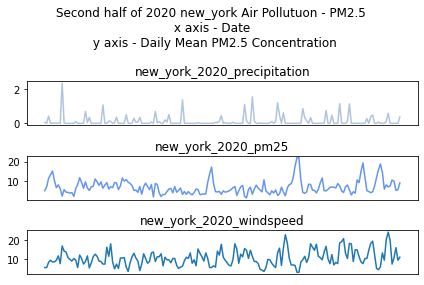

In [60]:
#plot
#new_york
new_york_2020 = new_york.assign(Date = pd.to_datetime(new_york.index))
new_york_2020 = new_york_2020.loc[(new_york_2020['Date'] > '2020-06-30'),:]

new_york_2020_pm25_plot = plt.figure()
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


plt.subplot(3, 1, 1)
plt.plot(new_york_2020['Date'], new_york_2020['PRCP'], c = '#B0C4DE')
plt.xticks(())
plt.title('new_york_2020_precipitation')

plt.subplot(3, 1, 2)
plt.plot(new_york_2020['Date'], new_york_2020['Daily Mean PM2.5 Concentration'], c = '#6495ED')
plt.xticks(())
plt.title('new_york_2020_pm25')

plt.subplot(3, 1, 3)
plt.plot(new_york_2020['Date'], new_york_2020['AWND'])
plt.xticks(())
plt.title('new_york_2020_windspeed')


plt.suptitle('Second half of 2020 new_york Air Pollutuon - PM2.5 \n x axis - Date \n y axis - Daily Mean PM2.5 Concentration', 
             fontsize='large')

new_york_2020_pm25_plot.tight_layout()
plt.show()


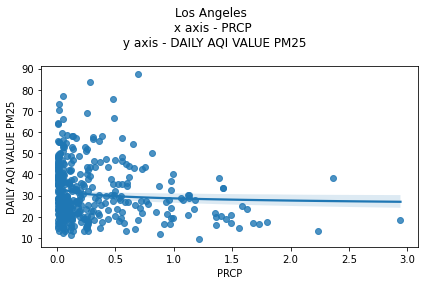

In [67]:
#los_angeles_relationship between PM2.5 and precipitation
los_angeles_select = los_angeles.loc[(los_angeles['PRCP'] > 0),:]
LOS_ANGELES_pm25_plot = plt.figure()
seaborn.regplot(x = 'PRCP',y = 'DAILY AQI VALUE PM25', logx = True, data = los_angeles_select)
plt.suptitle('Los Angeles 2010-2020 \n x axis - PRCP \n y axis - DAILY AQI VALUE PM25', 
             fontsize='large')
LOS_ANGELES_pm25_plot.tight_layout()
plt.show()

In [62]:
##regression

#regression of PM2.5 of a cold city(New York)
new_york_select = new_york.loc[(new_york['PRCP'] > 0) & (new_york['AWND'] > 0) & (new_york['SNWD'] > 0) , :].assign(log_base_PRCP = lambda x:np.log(x['PRCP'])).assign(log_base_AWND = lambda x:np.log(x['AWND'])).assign(log_base_SNWD = lambda x:np.log(x['SNWD']))
results = sm.ols('Q("DAILY AQI VALUE PM25") ~log_base_PRCP + log_base_AWND + log_base_SNWD', data=new_york_select).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q("DAILY AQI VALUE PM25")   R-squared:                       0.502
Model:                                   OLS   Adj. R-squared:                  0.486
Method:                        Least Squares   F-statistic:                     31.60
Date:                       Tue, 22 Mar 2022   Prob (F-statistic):           3.24e-14
Time:                               19:43:37   Log-Likelihood:                -369.66
No. Observations:                         98   AIC:                             747.3
Df Residuals:                             94   BIC:                             757.7
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        86.3975      6.832     12.646      0.000      72.832      99.963
log_base_PRCP    -1.1931      0.779     -1.531      0.129      -2.741       0.355
log_base_AWND   -21.0091      2.468     -8.512      0.000     -25.910     -16.108
log_base_SNWD     4.8093      1.305      3.685      0.000       2.218       7.401
==============================================================================
Omnibus:                       10.317   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.417
Skew:                           0.701   Prob(JB):                      0.00547
Kurtosis:                       3.765   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#regression of NO2 of a hot city(Dallas)
dallas_select = dallas.loc[(dallas['PRCP'] > 0) & (dallas['AWND'] > 0) & (dallas['TMAX'] > 0),:].assign(log_base_PRCP = lambda x:np.log(x['PRCP'])).assign(log_base_AWND = lambda x:np.log(x['AWND'])).assign(log_base_TMAX = lambda x:np.log(x['TMAX']))
results = sm.ols('Q("Daily Mean NO2 Concentration") ~log_base_PRCP + log_base_AWND + log_base_TMAX', data=dallas_select).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Daily Mean NO2 Concentration")   R-squared:                       0.243
Model:                                           OLS   Adj. R-squared:                  0.240
Method:                                Least Squares   F-statistic:                     94.31
Date:                               Tue, 22 Mar 2022   Prob (F-statistic):           6.19e-53
Time:                                       19:43:39   Log-Likelihood:                -2587.2
No. Observations:                                885   AIC:                             5182.
Df Residuals:                                    881   BIC:                             5202.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.8658      2.808     12.060      0.000      28.354      39.377
log_base_PRCP    -0.2870      0.093     -3.093      0.002      -0.469      -0.105
log_base_AWND    -6.7907      0.414    -16.387      0.000      -7.604      -5.977
log_base_TMAX    -1.8275      0.610     -2.995      0.003      -3.025      -0.630
==============================================================================
Omnibus:                      225.778   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.678
Skew:                           1.282   Prob(JB):                    1.85e-137
Kurtosis:                       6.241   Cond. No.                         99.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#regression of PM10 of a seaside city(Los Angeles)
los_angeles_select = los_angeles.loc[(los_angeles['PRCP'] > 0) & (los_angeles['AWND'] > 0) & (los_angeles['TAVG'] > 0),:].assign(log_base_PRCP = lambda x:np.log(x['PRCP'])).assign(log_base_AWND = lambda x:np.log(x['AWND'])).assign(log_base_TAVG = lambda x:np.log(x['TAVG']))
results = sm.ols('Q("Daily Mean PM10 Concentration") ~log_base_PRCP + log_base_AWND + log_base_TAVG', data=los_angeles_select).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Q("Daily Mean PM10 Concentration")   R-squared:                       0.329
Model:                                            OLS   Adj. R-squared:                  0.320
Method:                                 Least Squares   F-statistic:                     37.87
Date:                                Tue, 22 Mar 2022   Prob (F-statistic):           5.84e-20
Time:                                        19:43:39   Log-Likelihood:                -777.57
No. Observations:                                 236   AIC:                             1563.
Df Residuals:                                     232   BIC:                             1577.
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -141.3296     23.200     -6.092      0.000    -187.040     -95.620
log_base_PRCP    -1.5219      0.291     -5.228      0.000      -2.096      -0.948
log_base_AWND    -4.0278      1.291     -3.121      0.002      -6.570      -1.485
log_base_TAVG    39.1553      5.626      6.960      0.000      28.071      50.240
==============================================================================
Omnibus:                       26.214   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.109
Skew:                           0.798   Prob(JB):                     1.07e-07
Kurtosis:                       3.846   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#regression of PM2.5 of all five cities
data_five_cities_select = data_five_cities.loc[(data_five_cities['PRCP'] > 0) & (data_five_cities['AWND'] > 0) & (data_five_cities['SNWD'] > 0),:].assign(lag_WT01 = lambda x:x['WT01'].shift()).assign(log_base_PRCP = lambda x:np.log(x['PRCP'])).assign(log_base_AWND = lambda x:np.log(x['AWND'])).assign(log_base_SNWD = lambda x:np.log(x['SNWD'])).assign(log_base_TAVG =lambda x:np.log(x['TAVG'])).assign(lag_PM25  = lambda x:x['Daily Mean PM2.5 Concentration'].shift())
results = sm.ols('Q("DAILY AQI VALUE PM25") ~lag_WT01 + log_base_PRCP + log_base_AWND + log_base_SNWD + lag_PM25', data=data_five_cities_select).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q("DAILY AQI VALUE PM25")   R-squared:                       0.456
Model:                                   OLS   Adj. R-squared:                  0.429
Method:                        Least Squares   F-statistic:                     16.91
Date:                       Tue, 22 Mar 2022   Prob (F-statistic):           4.06e-12
Time:                               19:43:44   Log-Likelihood:                -410.12
No. Observations:                        107   AIC:                             832.2
Df Residuals:                            101   BIC:                             848.3
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        72.5519      7.270      9.980      0.000      58.131      86.973
lag_WT01         -6.0507      2.593     -2.334      0.022     -11.194      -0.907
log_base_PRCP    -1.2092      0.810     -1.492      0.139      -2.817       0.399
log_base_AWND   -16.7168      2.453     -6.816      0.000     -21.582     -11.852
log_base_SNWD     3.6989      1.401      2.640      0.010       0.919       6.479
lag_PM25          0.6861      0.241      2.852      0.005       0.209       1.163
==============================================================================
Omnibus:                        2.481   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.992
Skew:                           0.321   Prob(JB):                        0.369
Kurtosis:                       3.183   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""